# 模态I CHAMBER=4 RNN/LSTM/GRU/BiLSTM 虚拟量测[ok]

In [1]:
# 导入包
# This makes it so that matplotlib graphics will show up within the Jupyter Notebook.
%matplotlib inline

# Standard library import

# Data Analysis Tools
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools

# File Loading Tools 
import os

import pickle

## 导入模态I腔室4的训练数据和测试数据

In [2]:
X_train = np.load("./data phm 2016/X_train_r_modeI_chamber4_mm.npy")
y_train = np.load("./data phm 2016/y_train_modeI_chamber4_mm.npy")
X_test = np.load("./data phm 2016/X_test_r_modeI_chamber4_mm.npy")
y_test = np.load("./data phm 2016/y_test_modeI_chamber4_mm.npy")
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (798, 263, 19)
y_train shape:  (798, 1)
X_test shape:  (165, 263, 19)
y_test shape:  (165, 1)


In [3]:
# 基本参数
wafer_number, max_batch_length, variable_number = X_train.shape
wafer_number_test = X_test.shape[0]
print('训练集晶圆个数：', wafer_number)
print('最长时间序列长度：', max_batch_length)
print('字段个数：', variable_number)
print('训练集晶圆个数：', wafer_number_test)

训练集晶圆个数： 798
最长时间序列长度： 263
字段个数： 19
训练集晶圆个数： 165


## y值归一化

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
y_train_ss = ss.fit_transform(y_train)
y_train_ss

array([[-6.31832922e-01],
       [ 3.40847501e-01],
       [ 7.89009989e-01],
       [ 1.01072275e+00],
       [-8.51019297e-01],
       [-1.28761004e+00],
       [-1.06999189e-01],
       [-4.53677731e-01],
       [-1.06084452e+00],
       [ 1.70632375e-01],
       [-4.29824212e-02],
       [-1.67475585e+00],
       [ 7.90002497e-01],
       [-1.86872349e+00],
       [-1.65842458e+00],
       [-1.79297709e+00],
       [-2.21533436e+00],
       [-1.47950245e+00],
       [-2.27398257e+00],
       [-1.78361593e+00],
       [-2.28830626e+00],
       [-2.29103566e+00],
       [-1.31226485e+00],
       [-1.91586762e+00],
       [-1.80660151e+00],
       [-1.57266286e+00],
       [-1.71862921e+00],
       [-1.19099841e+00],
       [-2.91572923e+00],
       [-2.90377402e+00],
       [-2.95599348e+00],
       [-7.50279732e-01],
       [ 1.01895605e+00],
       [-2.12704626e+00],
       [-1.11696633e+00],
       [ 4.52978351e-01],
       [-1.29735467e+00],
       [-2.71808479e+00],
       [-2.4

## 导入画图的库

In [5]:
import utils.functions_plot as PL

## LSTM

In [7]:
# 导入必要的库
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adagrad
from keras.callbacks import ReduceLROnPlateau

In [7]:
# 文兰硕士论文
# activation=’tanh’ mask-batchnorm LSTM_hidden_unit=[40,40] dense_unit=[4,1]
# sgd-20 RMSprop-400 early_stopping, reduce_lr(没有用到文兰的这个参数)

# 网络结构
model_lstm = Sequential(name='sequential_lstm')
model_lstm.add(LSTM(input_shape=(max_batch_length,variable_number), units=40, activation='tanh', return_sequences=True, name='lstm1'))
model_lstm.add(LSTM(units=40, activation='tanh', return_sequences=False, name='lstm2'))


model_lstm.add(Dense(4, name='dense1'))
model_lstm.add(Dense(1, name='dense2'))
print(model_lstm.summary())

Model: "sequential_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm1 (LSTM)                (None, 263, 40)           9600      
                                                                 
 lstm2 (LSTM)                (None, 40)                12960     
                                                                 
 dense1 (Dense)              (None, 4)                 164       
                                                                 
 dense2 (Dense)              (None, 1)                 5         
                                                                 
Total params: 22,729
Trainable params: 22,729
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# 优化器
adam = Adam(learning_rate=0.001)
model_lstm.compile(loss='mse', optimizer=adam, metrics=['mse']) # rmsprop

nb_epoch = 400
batch_size = 200

In [9]:
history_lstm = model_lstm.fit(X_train, y_train_ss, epochs=nb_epoch, batch_size=batch_size) 

Epoch 1/400
4/4 [==============================] - 3s 216ms/step - loss: 1.0011 - mse: 1.0011
Epoch 2/400
4/4 [==============================] - 1s 210ms/step - loss: 1.0006 - mse: 1.0006
Epoch 3/400
4/4 [==============================] - 1s 211ms/step - loss: 1.0000 - mse: 1.0000
Epoch 4/400
4/4 [==============================] - 1s 210ms/step - loss: 0.9999 - mse: 0.9999
Epoch 5/400
4/4 [==============================] - 1s 207ms/step - loss: 0.9992 - mse: 0.9992
Epoch 6/400
4/4 [==============================] - 1s 210ms/step - loss: 0.9953 - mse: 0.9953
Epoch 7/400
4/4 [==============================] - 1s 211ms/step - loss: 0.9807 - mse: 0.9807
Epoch 8/400
4/4 [==============================] - 1s 203ms/step - loss: 0.9635 - mse: 0.9635
Epoch 9/400
4/4 [==============================] - 1s 203ms/step - loss: 0.9118 - mse: 0.9118
Epoch 10/400
4/4 [==============================] - 1s 204ms/step - loss: 0.8315 - mse: 0.8315
Epoch 11/400
4/4 [==============================] - 1s 203m

4/4 [==============================] - 1s 202ms/step - loss: 0.3241 - mse: 0.3241
Epoch 173/400
4/4 [==============================] - 1s 206ms/step - loss: 0.3131 - mse: 0.3131
Epoch 174/400
4/4 [==============================] - 1s 204ms/step - loss: 0.3148 - mse: 0.3148
Epoch 175/400
4/4 [==============================] - 1s 202ms/step - loss: 0.3119 - mse: 0.3119
Epoch 176/400
4/4 [==============================] - 1s 204ms/step - loss: 0.3198 - mse: 0.3198
Epoch 177/400
4/4 [==============================] - 1s 197ms/step - loss: 0.3109 - mse: 0.3109
Epoch 178/400
4/4 [==============================] - 1s 198ms/step - loss: 0.3009 - mse: 0.3009
Epoch 179/400
4/4 [==============================] - 1s 202ms/step - loss: 0.3057 - mse: 0.3057
Epoch 180/400
4/4 [==============================] - 1s 200ms/step - loss: 0.3157 - mse: 0.3157
Epoch 181/400
4/4 [==============================] - 1s 200ms/step - loss: 0.3162 - mse: 0.3162
Epoch 182/400
4/4 [==============================] - 1

4/4 [==============================] - 1s 206ms/step - loss: 0.3004 - mse: 0.3004
Epoch 343/400
4/4 [==============================] - 1s 206ms/step - loss: 0.2912 - mse: 0.2912
Epoch 344/400
4/4 [==============================] - 1s 207ms/step - loss: 0.2947 - mse: 0.2947
Epoch 345/400
4/4 [==============================] - 1s 207ms/step - loss: 0.2726 - mse: 0.2726
Epoch 346/400
4/4 [==============================] - 1s 204ms/step - loss: 0.2727 - mse: 0.2727
Epoch 347/400
4/4 [==============================] - 1s 200ms/step - loss: 0.2717 - mse: 0.2717
Epoch 348/400
4/4 [==============================] - 1s 201ms/step - loss: 0.2686 - mse: 0.2686
Epoch 349/400
4/4 [==============================] - 1s 195ms/step - loss: 0.2661 - mse: 0.2661
Epoch 350/400
4/4 [==============================] - 1s 203ms/step - loss: 0.2689 - mse: 0.2689
Epoch 351/400
4/4 [==============================] - 1s 203ms/step - loss: 0.2666 - mse: 0.2666
Epoch 352/400
4/4 [==============================] - 1

MSE:  10.180220839160441
RMSE:  3.1906458341784725
MAE:  2.4681624705991054
R^2:  0.7697830035239003
max absolute error:  12.330264562988283
min absolute error:  0.00021722412108715616
mean absolute error:  2.4681624705991054




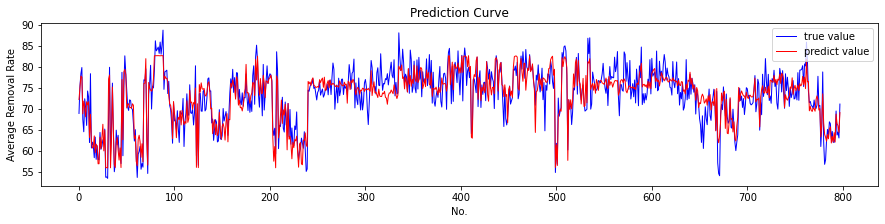

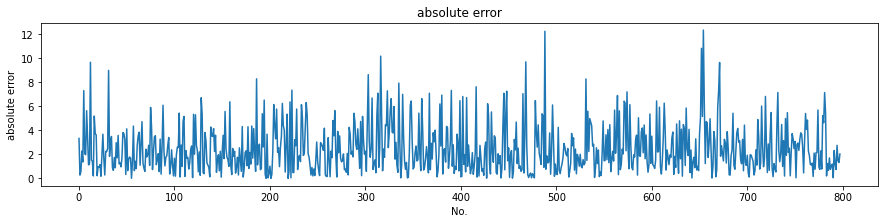

In [10]:
y_train_pre = model_lstm.predict(X_train)
y_train_pre = ss.inverse_transform(y_train_pre)
PL.plot_predict_curve(y_train, y_train_pre)

MSE:  12.543886625416464
RMSE:  3.5417349739098865
MAE:  2.6464205589710583
R^2:  0.6957115234876168
max absolute error:  12.89137703857422
min absolute error:  0.0032465698242205576
mean absolute error:  2.6464205589710583




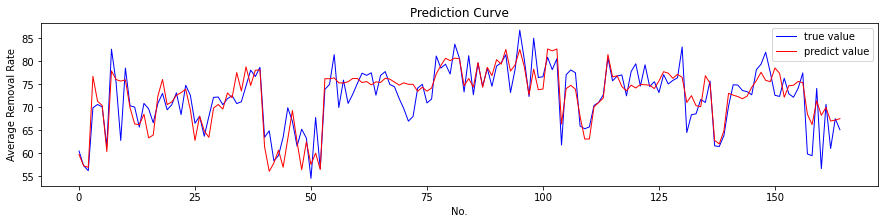

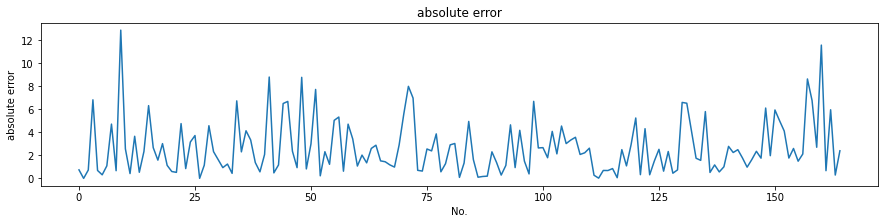

In [11]:
y_test_pre = model_lstm.predict(X_test)
y_test_pre = ss.inverse_transform(y_test_pre)
PL.plot_predict_curve(y_test, y_test_pre)

In [13]:
# save test pre
pickle.dump(y_test_pre, open('./results_save/predictions_lstm.pkl', 'wb'))

In [12]:
# # save model
# model_lstm.save('./save_model/modeI_lstm.h5')

## 输出lstm模型的中间层，在本模型中指的是第二个隐层lstm2

In [17]:
from keras.models import Model

In [22]:
layer_lstm2 = model_lstm.get_layer('lstm2').output
intermediate_layer_model = Model(inputs=model_lstm.input, outputs=layer_lstm2)

In [27]:
# pre train and test for 2nd hidden layer
lstm2_output_train = intermediate_layer_model.predict(X_train) #【注意这里有归一化的问题】
lstm2_output_test = intermediate_layer_model.predict(X_test) #【注意这里有归一化的问题】

In [28]:
# lstm模型的第2个隐层的输出分别保存在lstm2_output_train（训练集）和lstm2_output_test（测试集）中
print(lstm2_output_train.shape)
print(lstm2_output_test.shape)

(798, 40)
(165, 40)


In [123]:
# 保存数组到本地
np.save("./data phm 2016/lstm2_output_train.npy", lstm2_output_train)
np.save("./data phm 2016/lstm2_output_test.npy", lstm2_output_test)

## LSTM+SAE
LSTM模型的第2个隐层的输出作为SAE第一个AE的输入

In [ ]:
# define model 
# 文兰硕士论文给出的SAE结构和参数
# activation=tanh SAE_hidden_unit=[20,15]，第一步无监督分层训练adadelta-200epoch，第二步有监督微调sgd-20epoch+RMSprop-400epoch early_stopping, reduce_lr

In [130]:
# step1：无监督分层训练
# hyperparameters

# number of wafers as number of inputs
n_inputs = 40 # lstm模型第2个隐层的神经元个数
n_outputs = n_inputs

# number of hidden layers
n_layers = 2
# neurons in each hidden layer
n_neurons = [20,15]
# add decoder layers:
n_neurons.extend(list(reversed(n_neurons)))
n_layers = n_layers * 2

model_lstm_SAE = Sequential(name='model_lstm_SAE')

# add input to first layer
model_lstm_SAE.add(Dense(units=n_neurons[0], activation='relu', input_shape=(n_inputs,), name='dense0'))

for i in range(1,n_layers):
    model_lstm_SAE.add(Dense(units=n_neurons[i], activation='relu', name='dense'+str(i)))
    
# add last layer as output layer
model_lstm_SAE.add(Dense(units=n_outputs, activation='tanh', name='dense'+str(n_layers)))
model_lstm_SAE.summary()

Model: "model_lstm_SAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense0 (Dense)               (None, 20)                820       
_________________________________________________________________
dense1 (Dense)               (None, 15)                315       
_________________________________________________________________
dense2 (Dense)               (None, 15)                240       
_________________________________________________________________
dense3 (Dense)               (None, 20)                320       
_________________________________________________________________
dense4 (Dense)               (None, 40)                840       
Total params: 2,535
Trainable params: 2,535
Non-trainable params: 0
_________________________________________________________________


In [131]:
learning_rate = 0.001
model_lstm_SAE.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [132]:
# fit SAE
n_epochs = 100
batch_size = 200
history_lstm_SAE = model_lstm_SAE.fit(lstm2_output_train, lstm2_output_train, batch_size=batch_size, epochs=n_epochs)

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 0.0391 - mse: 0.0391
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0366 - mse: 0.0366
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0349 - mse: 0.0349
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0357 - mse: 0.0357
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0345 - mse: 0.0345
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0327 - mse: 0.0327
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0331 - mse: 0.0331
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0312 - mse: 0.0312
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0282 - mse: 0.0282
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0281 - mse: 0.0281
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 

Text(0, 0.5, 'mse loss')

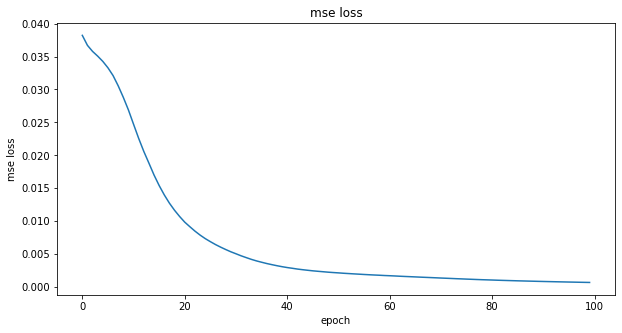

In [136]:
# plot loss
plt.figure(figsize=(10,5))
plt.plot(history_lstm_SAE.history['mse'])
plt.title('mse loss')
plt.xlabel('epoch')
plt.ylabel('mse loss')

In [143]:
# step2: 有监督微调
# 重新构建一个model
layer_SAE_dense1 = model_lstm_SAE.get_layer('dense1').output
layer_dense_output = Dense(1, name='dense_output')(layer_SAE_dense1)
model_lstm_SAE2 = Model(inputs=model_lstm_SAE.input, outputs=layer_dense_output, name='model_lstm_SAE2')
print(model_lstm_SAE2.summary())

Model: "model_lstm_SAE2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense0_input (InputLayer)    [(None, 40)]              0         
_________________________________________________________________
dense0 (Dense)               (None, 20)                820       
_________________________________________________________________
dense1 (Dense)               (None, 15)                315       
_________________________________________________________________
dense_output (Dense)         (None, 1)                 16        
Total params: 1,151
Trainable params: 1,151
Non-trainable params: 0
_________________________________________________________________
None


In [144]:
# compile
model_lstm_SAE2.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [145]:
# fit
model_lstm_SAE2.fit(lstm2_output_train, y_train, epochs=200, batch_size=200)

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 3618.1650 - mse: 3618.1650
Epoch 2/200
4/4 [==============================] - 0s 1ms/step - loss: 3581.7706 - mse: 3581.7706
Epoch 3/200
4/4 [==============================] - 0s 1ms/step - loss: 3435.3984 - mse: 3435.3984
Epoch 4/200
4/4 [==============================] - 0s 1ms/step - loss: 3346.4887 - mse: 3346.4887
Epoch 5/200
4/4 [==============================] - 0s 990us/step - loss: 3283.1082 - mse: 3283.1082
Epoch 6/200
4/4 [==============================] - 0s 918us/step - loss: 3155.8506 - mse: 3155.8506
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 3050.2867 - mse: 3050.2867
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 2976.2499 - mse: 2976.2499
Epoch 9/200
4/4 [==============================] - 0s 950us/step - loss: 2882.5168 - mse: 2882.5168
Epoch 10/200
4/4 [==============================] - 0s 969us/step - loss: 2799.0985 - mse: 2799.0985
Epoch 11/20

4/4 [==============================] - 0s 963us/step - loss: 14.1437 - mse: 14.1437
Epoch 169/200
4/4 [==============================] - 0s 1ms/step - loss: 14.1513 - mse: 14.1513
Epoch 170/200
4/4 [==============================] - 0s 1ms/step - loss: 13.7599 - mse: 13.7599
Epoch 171/200
4/4 [==============================] - 0s 1ms/step - loss: 14.1754 - mse: 14.1754
Epoch 172/200
4/4 [==============================] - 0s 937us/step - loss: 13.9539 - mse: 13.9539
Epoch 173/200
4/4 [==============================] - 0s 1ms/step - loss: 12.3350 - mse: 12.3350
Epoch 174/200
4/4 [==============================] - 0s 880us/step - loss: 12.2336 - mse: 12.2336
Epoch 175/200
4/4 [==============================] - 0s 970us/step - loss: 12.7459 - mse: 12.7459
Epoch 176/200
4/4 [==============================] - 0s 977us/step - loss: 13.6657 - mse: 13.6657
Epoch 177/200
4/4 [==============================] - 0s 1ms/step - loss: 13.2585 - mse: 13.2585
Epoch 178/200
4/4 [=========================

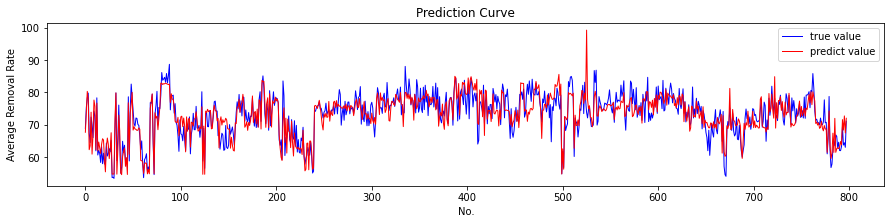

MSE:  11.947664881554763
RMSE:  3.4565394372919807
MAE:  2.6306493326058065
R^2:  0.7298137665782356
max absolute error:  25.431052636718746
min absolute error:  0.00022595214844045586
mean absolute error:  2.6306493326058065


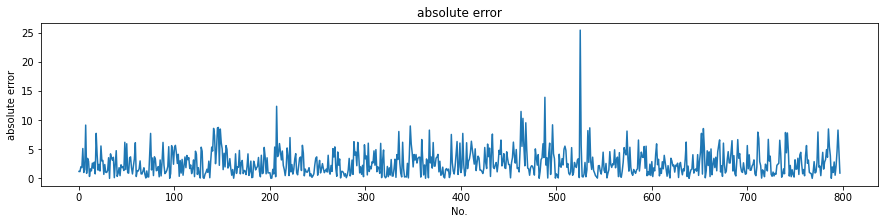

In [146]:
y_train_pre = model_lstm_SAE2.predict(lstm2_output_train)
PL.plot_predict_curve(y_train, y_train_pre)

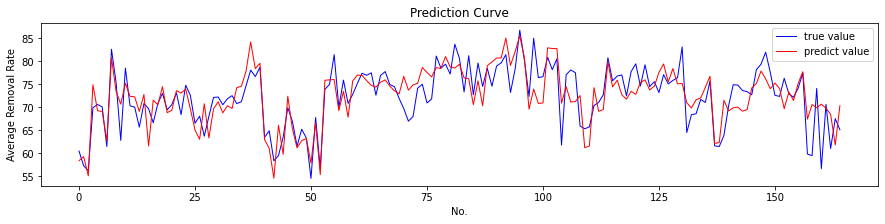

MSE:  15.913779167774768
RMSE:  3.9892078371244044
MAE:  3.1436875079530657
R^2:  0.6139649724906602
max absolute error:  14.01363063964844
min absolute error:  0.09004916992186907
mean absolute error:  3.1436875079530657


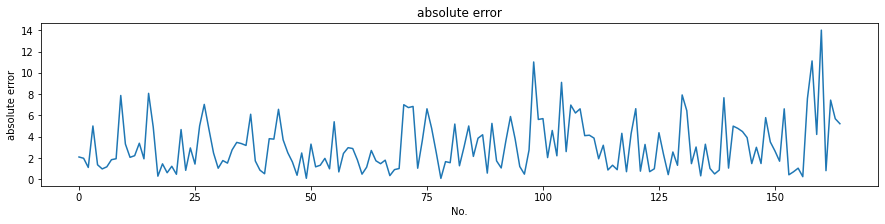

In [147]:
y_test_pre = model_lstm_SAE2.predict(lstm2_output_test)
PL.plot_predict_curve(y_test, y_test_pre)

## Simple RNN

In [14]:
# 导入必要的库（optimizers库需要source activate base环境）
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Activation, BatchNormalization, Flatten
from keras.optimizers import Adam, Adagrad
from keras.callbacks import ReduceLROnPlateau

In [27]:
# 文兰硕士论文
# activation=’tanh’ mask-batchnorm LSTM_hidden_unit=[40,40] dense_unit=[4,1]
# sgd-20 RMSprop-400 early_stopping, reduce_lr

# 网络结构
model_rnn = Sequential(name='model_rnn')
model_rnn.add(SimpleRNN(input_shape=(max_batch_length,variable_number), units=40, activation='tanh', return_sequences=True))
model_rnn.add(SimpleRNN(units=40, activation='tanh', return_sequences=False))


model_rnn.add(Dense(4))
model_rnn.add(Dense(1))
print(model_rnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 263, 40)           2400      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 4)                 164       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5,809
Trainable params: 5,809
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# 优化器
adam = Adam(learning_rate=0.001)
model_rnn.compile(loss='mse', optimizer=adam, metrics=['mse']) # rmsprop

nb_epoch = 100
batch_size = 200

In [29]:
# fit
model_rnn.fit(X_train, y_train_ss, epochs=nb_epoch, batch_size=batch_size)

Epoch 1/100
4/4 [==============================] - 1s 71ms/step - loss: 1.2439 - mse: 1.2439
Epoch 2/100
4/4 [==============================] - 0s 72ms/step - loss: 0.8332 - mse: 0.8332
Epoch 3/100
4/4 [==============================] - 0s 72ms/step - loss: 0.6926 - mse: 0.6926
Epoch 4/100
4/4 [==============================] - 0s 72ms/step - loss: 0.6456 - mse: 0.6456
Epoch 5/100
4/4 [==============================] - 0s 73ms/step - loss: 0.6068 - mse: 0.6068
Epoch 6/100
4/4 [==============================] - 0s 71ms/step - loss: 0.5949 - mse: 0.5949
Epoch 7/100
4/4 [==============================] - 0s 70ms/step - loss: 0.5839 - mse: 0.5839
Epoch 8/100
4/4 [==============================] - 0s 70ms/step - loss: 0.5371 - mse: 0.5371
Epoch 9/100
4/4 [==============================] - 0s 72ms/step - loss: 0.5152 - mse: 0.5152
Epoch 10/100
4/4 [==============================] - 0s 73ms/step - loss: 0.4875 - mse: 0.4875
Epoch 11/100
4/4 [==============================] - 0s 73ms/step - lo

MSE:  15.097568656249962
RMSE:  3.885558988903651
MAE:  3.0367662237946544
R^2:  0.6585813839358508
max absolute error:  17.076047534179686
min absolute error:  0.003754492187496794
mean absolute error:  3.0367662237946544




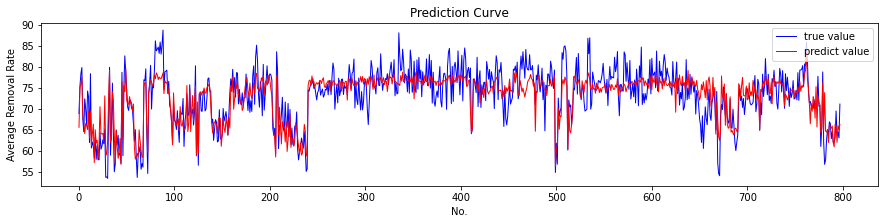

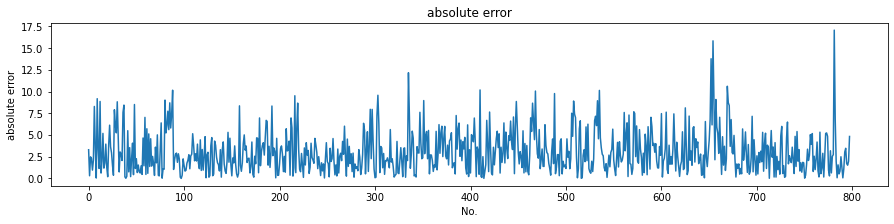

In [30]:
# pre train
y_train_pre = model_rnn.predict(X_train)
y_train_pre = ss.inverse_transform(y_train_pre)
PL.plot_predict_curve(y_train, y_train_pre)

MSE:  18.96082720553938
RMSE:  4.354403197401382
MAE:  3.4422290628699104
R^2:  0.5400499545254321
max absolute error:  18.90266109619141
min absolute error:  0.017162292480470853
mean absolute error:  3.4422290628699104




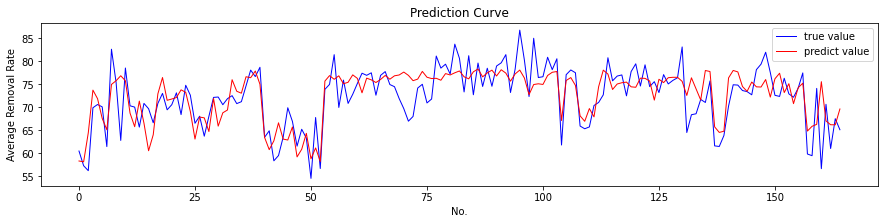

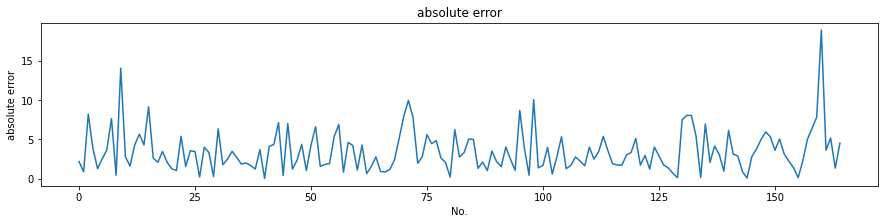

In [31]:
# pre test
y_test_pre = model_rnn.predict(X_test)
y_test_pre = ss.inverse_transform(y_test_pre)
PL.plot_predict_curve(y_test, y_test_pre)

In [12]:
# # save model
# model_rnn.save('./save_model/modeI_rnn.h5')

In [32]:
# save test pre
pickle.dump(y_test_pre, open('./results_save/predictions_rnn.pkl', 'wb'))

## GRU

In [9]:
# 导入必要的库
from keras.models import Sequential
from keras.layers import GRU, Dense, Activation, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adagrad
from keras.callbacks import ReduceLROnPlateau

In [10]:
# 网络结构
model_gru = Sequential(name='model_GRU')
model_gru.add(GRU(input_shape=(max_batch_length,variable_number), units=40, activation='relu', return_sequences=True))
model_gru.add(GRU(units=40, activation='relu', return_sequences=False))


model_gru.add(Dense(4))
model_gru.add(Dense(1))
print(model_gru.summary())

Model: "model_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 263, 40)           7320      
                                                                 
 gru_1 (GRU)                 (None, 40)                9840      
                                                                 
 dense (Dense)               (None, 4)                 164       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17,329
Trainable params: 17,329
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# 优化器
adam = Adam(learning_rate=0.001)
model_gru.compile(loss='mse', optimizer=adam, metrics=['mse']) # rmsprop

nb_epoch = 150
batch_size = 100


In [12]:
# fit
model_gru.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size)

Epoch 1/150
8/8 [==============================] - 3s 135ms/step - loss: 5378.9595 - mse: 5378.9595
Epoch 2/150
8/8 [==============================] - 1s 131ms/step - loss: 5358.4956 - mse: 5358.4956
Epoch 3/150
8/8 [==============================] - 1s 132ms/step - loss: 5325.7085 - mse: 5325.7085
Epoch 4/150
8/8 [==============================] - 1s 130ms/step - loss: 5267.6323 - mse: 5267.6323
Epoch 5/150
8/8 [==============================] - 1s 131ms/step - loss: 5149.5728 - mse: 5149.5728
Epoch 6/150
8/8 [==============================] - 1s 134ms/step - loss: 4729.0273 - mse: 4729.0273
Epoch 7/150
8/8 [==============================] - 1s 131ms/step - loss: 579.7863 - mse: 579.7863
Epoch 8/150
8/8 [==============================] - 1s 131ms/step - loss: 152.1438 - mse: 152.1438
Epoch 9/150
8/8 [==============================] - 1s 131ms/step - loss: 94.5098 - mse: 94.5098
Epoch 10/150
8/8 [==============================] - 1s 132ms/step - loss: 55.8766 - mse: 55.8766
Epoch 11/15

MSE:  10.885231895134377
RMSE:  3.2992774807727794
MAE:  2.510590347641871
R^2:  0.7538397808420878
max absolute error:  13.538009289550786
min absolute error:  0.0016157226562540927
mean absolute error:  2.510590347641871




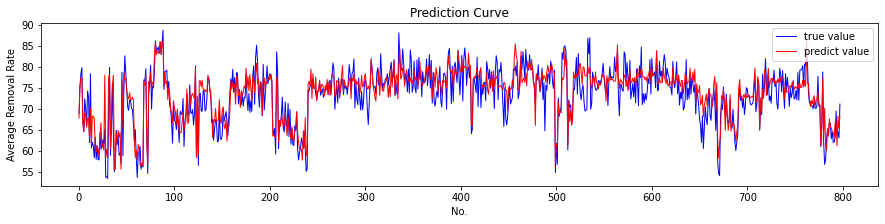

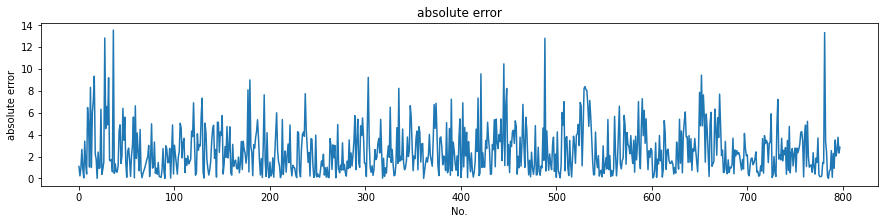

In [16]:
# pre train
y_train_pre = model_gru.predict(X_train)
PL.plot_predict_curve(y_train, y_train_pre)

MSE:  12.12187092700724
RMSE:  3.481647731607441
MAE:  2.79204394309304
R^2:  0.7059487424427897
max absolute error:  10.549473535156253
min absolute error:  0.012969885253909297
mean absolute error:  2.79204394309304




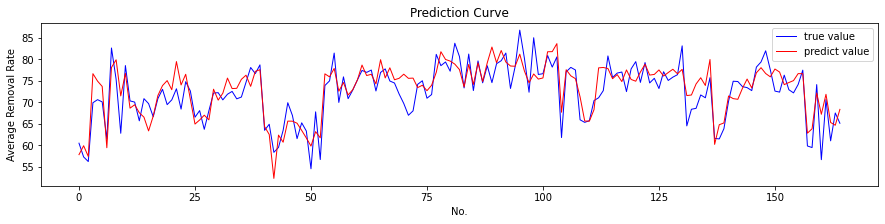

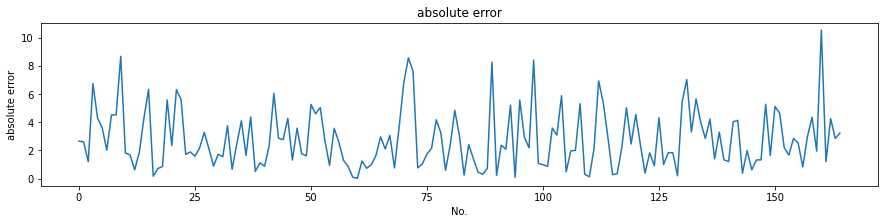

In [17]:
# pre test
y_test_pre = model_gru.predict(X_test)
PL.plot_predict_curve(y_test, y_test_pre)

In [16]:
# # save model
# model_gru.save('./save_model/modeI_gru.h5')

In [19]:
# save test pre
pickle.dump(y_test_pre, open('./results_save/predictions_gru.pkl', 'wb'))

## BiLSTM

In [20]:
# 导入必要的库
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Activation, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adagrad
from keras.callbacks import ReduceLROnPlateau

In [21]:
# 网络结构
model_biLSTM = Sequential(name='model_biLSTM')
model_biLSTM.add(Bidirectional(LSTM(units=40, activation='tanh', return_sequences=True), input_shape=(max_batch_length,variable_number), name='biLSTM1'))
model_biLSTM.add(Bidirectional(LSTM(units=40, activation='tanh', return_sequences=False), name='biLSTM2'))


model_biLSTM.add(Dense(4, name='dense1'))
model_biLSTM.add(Dense(1, name='dense2'))
print(model_biLSTM.summary())

Model: "model_biLSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 biLSTM1 (Bidirectional)     (None, 263, 80)           19200     
                                                                 
 biLSTM2 (Bidirectional)     (None, 80)                38720     
                                                                 
 dense1 (Dense)              (None, 4)                 324       
                                                                 
 dense2 (Dense)              (None, 1)                 5         
                                                                 
Total params: 58,249
Trainable params: 58,249
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# 优化器
adam = Adam(learning_rate=0.001)
model_biLSTM.compile(loss='mse', optimizer=adam, metrics=['mse']) # rmsprop

nb_epoch = 50
batch_size = 200

In [23]:
# fit
history_biLSTM = model_biLSTM.fit(X_train, y_train_ss, epochs=nb_epoch, batch_size=batch_size) 

Epoch 1/50
4/4 [==============================] - 5s 393ms/step - loss: 0.9832 - mse: 0.9832
Epoch 2/50
4/4 [==============================] - 2s 385ms/step - loss: 0.8419 - mse: 0.8419
Epoch 3/50
4/4 [==============================] - 2s 384ms/step - loss: 0.6906 - mse: 0.6906
Epoch 4/50
4/4 [==============================] - 2s 384ms/step - loss: 0.5731 - mse: 0.5731
Epoch 5/50
4/4 [==============================] - 2s 391ms/step - loss: 0.4981 - mse: 0.4981
Epoch 6/50
4/4 [==============================] - 2s 386ms/step - loss: 0.4616 - mse: 0.4616
Epoch 7/50
4/4 [==============================] - 2s 384ms/step - loss: 0.4539 - mse: 0.4539
Epoch 8/50
4/4 [==============================] - 2s 391ms/step - loss: 0.4357 - mse: 0.4357
Epoch 9/50
4/4 [==============================] - 2s 387ms/step - loss: 0.4230 - mse: 0.4230
Epoch 10/50
4/4 [==============================] - 2s 390ms/step - loss: 0.4260 - mse: 0.4260
Epoch 11/50
4/4 [==============================] - 2s 411ms/step - lo

MSE:  12.044378453920892
RMSE:  3.4705011819506546
MAE:  2.6986967702688727
R^2:  0.7276266717695496
max absolute error:  13.63776072998047
min absolute error:  0.0010055541992244343
mean absolute error:  2.6986967702688727




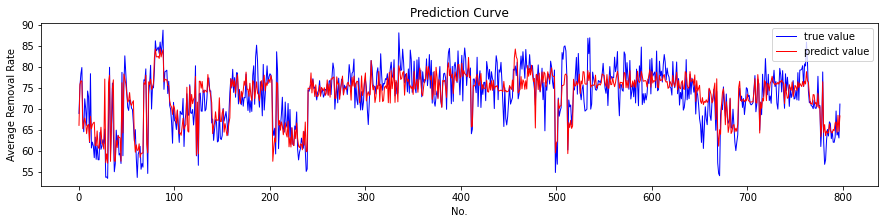

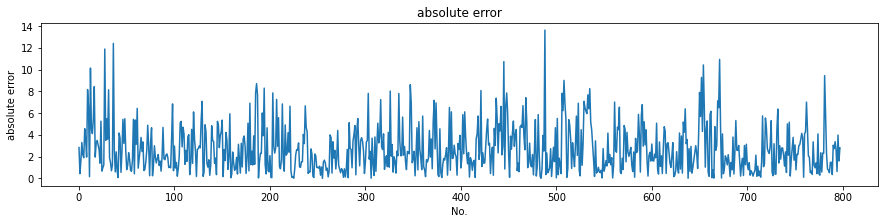

In [24]:
# pre train
y_train_pre = model_biLSTM.predict(X_train)
y_train_pre = ss.inverse_transform(y_train_pre)
PL.plot_predict_curve(y_train, y_train_pre)

MSE:  12.205804584299
RMSE:  3.493680664327952
MAE:  2.7507204543604993
R^2:  0.7039126873134589
max absolute error:  11.462650842285157
min absolute error:  0.022744689941404772
mean absolute error:  2.7507204543604993




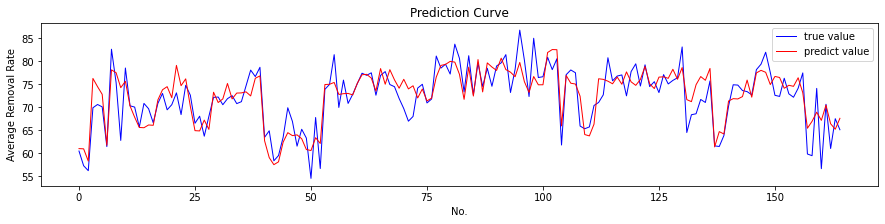

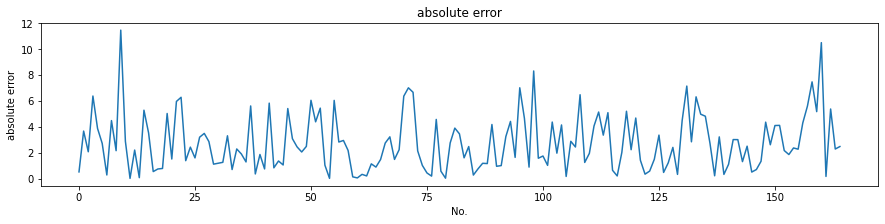

In [25]:
# pre test
y_test_pre = model_biLSTM.predict(X_test)
y_test_pre = ss.inverse_transform(y_test_pre)
PL.plot_predict_curve(y_test, y_test_pre)

Text(0.5, 1.0, 'mse of each epoch')

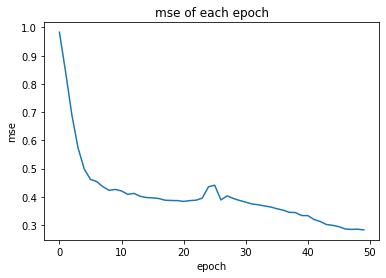

In [26]:
plt.plot(history_biLSTM.history['mse'])
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('mse of each epoch')

In [27]:
# # save model
# model_biLSTM.save('./save_model/modeI_biLSTM.h5')

In [28]:
pickle.dump(y_test_pre, open('./results_save/predictions_bilstm.pkl', 'wb'))

## 输出BiLSTM网络的第二层

In [14]:
from keras.models import Model

In [18]:
layer_biLstm2 = model_biLSTM.get_layer('biLSTM2').output
intermediate_layer_model = Model(inputs=model_biLSTM.input, outputs=layer_biLstm2)
# pre train and test for 2nd hidden layer
biLstm2_output_train = intermediate_layer_model.predict(X_train) #【注意这里有归一化的问题】
biLstm2_output_test = intermediate_layer_model.predict(X_test) #【注意这里有归一化的问题】

In [19]:
print(biLstm2_output_train.shape)
print(biLstm2_output_test.shape)

(798, 80)
(165, 80)


In [20]:
# 保存数组到本地
# 保存数组到本地
np.save("./data phm 2016/biLSTM2_output_train.npy", biLstm2_output_train)
np.save("./data phm 2016/biLSTM2_output_test.npy", biLstm2_output_test)

## BiLSTM+SAE
BiLSTM第2个隐层的输出作为SAE的输入

In [21]:
# define model 
# 文兰硕士论文给出的SAE结构和参数
# activation=tanh SAE_hidden_unit=[20,15]，第一步无监督分层训练adadelta-200epoch，第二步有监督微调sgd-20epoch+RMSprop-400epoch early_stopping, reduce_lr

In [39]:
# step1：无监督分层训练
# hyperparameters

# number of wafers as number of inputs
n_inputs = 80 # biLSTM模型第2个隐层的神经元个数
n_outputs = n_inputs

# number of hidden layers
n_layers = 2
# neurons in each hidden layer
n_neurons = [20,15]
# add decoder layers:
n_neurons.extend(list(reversed(n_neurons)))
n_layers = n_layers * 2

model_biLSTM_SAE = Sequential(name='model_biLSTM_SAE')

# add input to first layer
model_biLSTM_SAE.add(Dense(units=n_neurons[0], activation='relu', input_shape=(n_inputs,), name='dense0'))

for i in range(1,n_layers):
    model_biLSTM_SAE.add(Dense(units=n_neurons[i], activation='relu', name='dense'+str(i)))
    
# add last layer as output layer
model_biLSTM_SAE.add(Dense(units=n_outputs, activation='tanh', name='dense'+str(n_layers)))
model_biLSTM_SAE.summary()

Model: "model_biLSTM_SAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense0 (Dense)               (None, 20)                1620      
_________________________________________________________________
dense1 (Dense)               (None, 15)                315       
_________________________________________________________________
dense2 (Dense)               (None, 15)                240       
_________________________________________________________________
dense3 (Dense)               (None, 20)                320       
_________________________________________________________________
dense4 (Dense)               (None, 80)                1680      
Total params: 4,175
Trainable params: 4,175
Non-trainable params: 0
_________________________________________________________________


In [23]:
learning_rate = 0.001
model_biLSTM_SAE.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [24]:
# fit SAE
n_epochs = 100
batch_size = 200
history_biLSTM_SAE = model_biLSTM_SAE.fit(biLstm2_output_train, biLstm2_output_train, batch_size=batch_size, epochs=n_epochs)

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 0.0430 - mse: 0.0430
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0420 - mse: 0.0420
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0405 - mse: 0.0405
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0392 - mse: 0.0392
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0380 - mse: 0.0380
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0365 - mse: 0.0365
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0347 - mse: 0.0347
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0330 - mse: 0.0330
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0311 - mse: 0.0311
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0288 - mse: 0.0288
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0267 

Text(0, 0.5, 'mse loss')

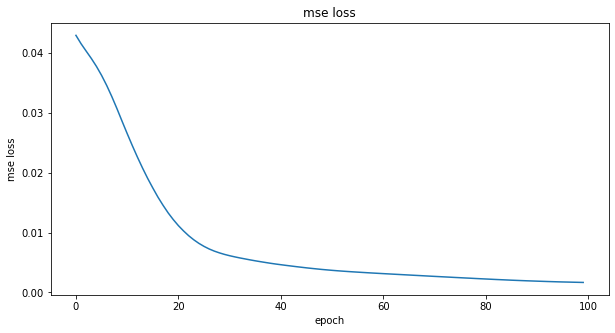

In [25]:
# plot loss
plt.figure(figsize=(10,5))
plt.plot(history_biLSTM_SAE.history['mse'])
plt.title('mse loss')
plt.xlabel('epoch')
plt.ylabel('mse loss')

In [56]:
# step2: 有监督微调
# 重新构建一个model
layer_SAE_dense1 = model_biLSTM_SAE.get_layer('dense1').output
layer_dense_output = Dense(1, name='dense_output')(layer_SAE_dense1)
model_biLSTM_SAE2 = Model(inputs=model_biLSTM_SAE.input, outputs=layer_dense_output, name='model_biLSTM_SAE2')
print(model_biLSTM_SAE2.summary())

Model: "model_biLSTM_SAE2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense0_input (InputLayer)    [(None, 80)]              0         
_________________________________________________________________
dense0 (Dense)               (None, 20)                1620      
_________________________________________________________________
dense1 (Dense)               (None, 15)                315       
_________________________________________________________________
dense_output (Dense)         (None, 1)                 16        
Total params: 1,951
Trainable params: 1,951
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
# compile
model_biLSTM_SAE2.compile(loss='mse', optimizer='adam', metrics=['mse'])

Epoch 1/600
4/4 [==============================] - 0s 1ms/step - loss: 10698.8275 - mse: 10698.8275
Epoch 2/600
4/4 [==============================] - 0s 1ms/step - loss: 10245.9621 - mse: 10245.9621
Epoch 3/600
4/4 [==============================] - 0s 1ms/step - loss: 9882.1135 - mse: 9882.1135
Epoch 4/600
4/4 [==============================] - 0s 1ms/step - loss: 9439.3178 - mse: 9439.3178
Epoch 5/600
4/4 [==============================] - 0s 1ms/step - loss: 9130.4635 - mse: 9130.4635
Epoch 6/600
4/4 [==============================] - 0s 1ms/step - loss: 8755.7721 - mse: 8755.7721
Epoch 7/600
4/4 [==============================] - 0s 1ms/step - loss: 8438.5277 - mse: 8438.5277
Epoch 8/600
4/4 [==============================] - 0s 1ms/step - loss: 8105.0531 - mse: 8105.0531
Epoch 9/600
4/4 [==============================] - 0s 1ms/step - loss: 7794.4745 - mse: 7794.4745
Epoch 10/600
4/4 [==============================] - 0s 1ms/step - loss: 7503.1002 - mse: 7503.1002
Epoch 11/600
4/

4/4 [==============================] - 0s 1ms/step - loss: 16.0168 - mse: 16.0168
Epoch 169/600
4/4 [==============================] - 0s 851us/step - loss: 15.6788 - mse: 15.6788
Epoch 170/600
4/4 [==============================] - 0s 993us/step - loss: 16.1523 - mse: 16.1523
Epoch 171/600
4/4 [==============================] - 0s 951us/step - loss: 16.6365 - mse: 16.6365
Epoch 172/600
4/4 [==============================] - 0s 973us/step - loss: 15.6670 - mse: 15.6670
Epoch 173/600
4/4 [==============================] - 0s 947us/step - loss: 16.2679 - mse: 16.2679
Epoch 174/600
4/4 [==============================] - 0s 1ms/step - loss: 16.0856 - mse: 16.0856
Epoch 175/600
4/4 [==============================] - 0s 1ms/step - loss: 16.1769 - mse: 16.1769
Epoch 176/600
4/4 [==============================] - 0s 968us/step - loss: 15.7215 - mse: 15.7215
Epoch 177/600
4/4 [==============================] - 0s 1ms/step - loss: 15.8042 - mse: 15.8042
Epoch 178/600
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 16.1020 - mse: 16.1020
Epoch 337/600
4/4 [==============================] - 0s 1ms/step - loss: 14.3403 - mse: 14.3403
Epoch 338/600
4/4 [==============================] - 0s 1ms/step - loss: 15.0156 - mse: 15.0156
Epoch 339/600
4/4 [==============================] - 0s 863us/step - loss: 15.0448 - mse: 15.0448
Epoch 340/600
4/4 [==============================] - 0s 1ms/step - loss: 15.9977 - mse: 15.9977
Epoch 341/600
4/4 [==============================] - 0s 880us/step - loss: 15.3293 - mse: 15.3293
Epoch 342/600
4/4 [==============================] - 0s 928us/step - loss: 16.0714 - mse: 16.0714
Epoch 343/600
4/4 [==============================] - 0s 1ms/step - loss: 14.8463 - mse: 14.8463
Epoch 344/600
4/4 [==============================] - 0s 1ms/step - loss: 15.2920 - mse: 15.2920
Epoch 345/600
4/4 [==============================] - 0s 932us/step - loss: 14.8159 - mse: 14.8159
Epoch 346/600
4/4 [===========================

4/4 [==============================] - 0s 949us/step - loss: 14.4007 - mse: 14.4007
Epoch 505/600
4/4 [==============================] - 0s 993us/step - loss: 14.7056 - mse: 14.7056
Epoch 506/600
4/4 [==============================] - 0s 1ms/step - loss: 15.2549 - mse: 15.2549
Epoch 507/600
4/4 [==============================] - 0s 1ms/step - loss: 14.7271 - mse: 14.7271
Epoch 508/600
4/4 [==============================] - 0s 958us/step - loss: 14.1617 - mse: 14.1617
Epoch 509/600
4/4 [==============================] - 0s 1ms/step - loss: 14.5114 - mse: 14.5114
Epoch 510/600
4/4 [==============================] - 0s 985us/step - loss: 14.2628 - mse: 14.2628
Epoch 511/600
4/4 [==============================] - 0s 1ms/step - loss: 13.9466 - mse: 13.9466
Epoch 512/600
4/4 [==============================] - 0s 1ms/step - loss: 14.9527 - mse: 14.9527
Epoch 513/600
4/4 [==============================] - 0s 1ms/step - loss: 15.4660 - mse: 15.4660
Epoch 514/600
4/4 [===========================

Text(0, 0.5, 'mse loss')

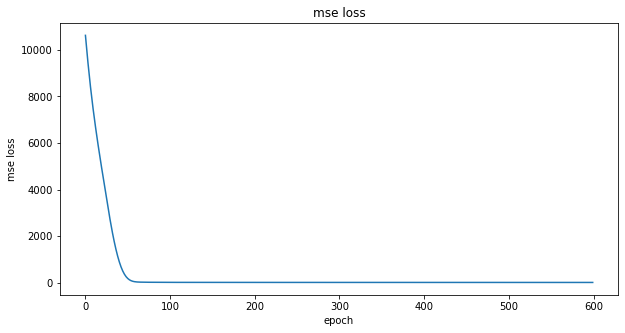

In [58]:
# fit
history_biLSTM_SAE2 = model_biLSTM_SAE2.fit(biLstm2_output_train, y_train, epochs=600, batch_size=200)
# plot model loss
# plot loss
plt.figure(figsize=(10,5))
plt.plot(history_biLSTM_SAE2.history['mse'])
plt.title('mse loss')
plt.xlabel('epoch')
plt.ylabel('mse loss')

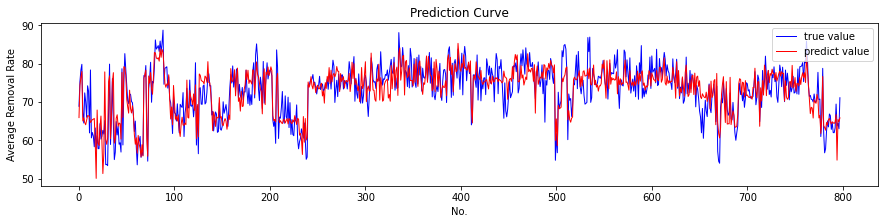

MSE:  14.276966002130886
RMSE:  3.7784872637248474
MAE:  2.985624651021169
R^2:  0.6771386118502885
max absolute error:  14.754047961425783
min absolute error:  0.004380456542975253
mean absolute error:  2.985624651021169


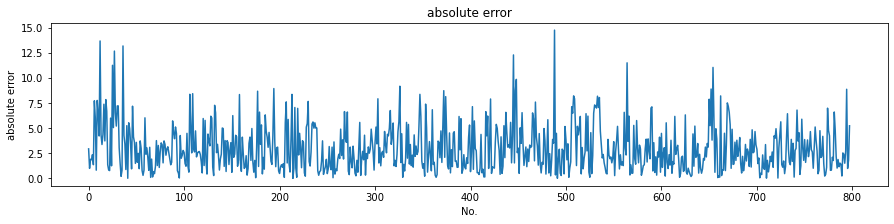

In [59]:
y_train_pre = model_biLSTM_SAE2.predict(biLstm2_output_train)
PL.plot_predict_curve(y_train, y_train_pre)

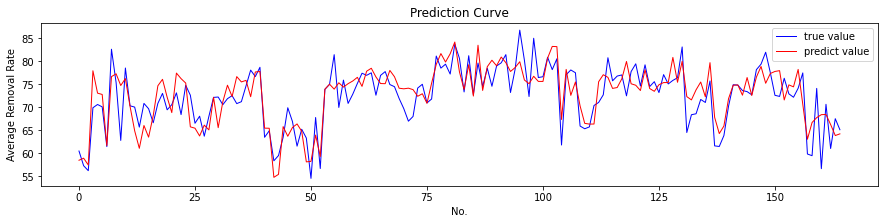

MSE:  14.913736035673832
RMSE:  3.861830658596235
MAE:  3.068885199899384
R^2:  0.6382239290804852
max absolute error:  11.933178491210938
min absolute error:  0.022702587890620407
mean absolute error:  3.068885199899384


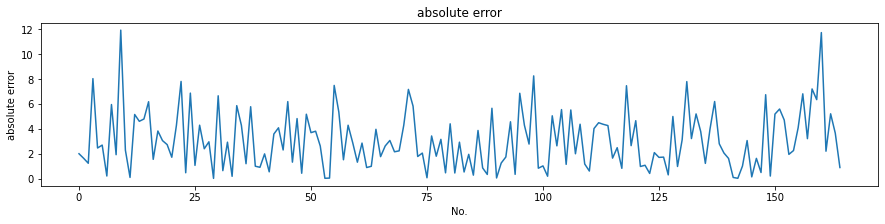

In [60]:
y_test_pre = model_biLSTM_SAE2.predict(biLstm2_output_test)
PL.plot_predict_curve(y_test, y_test_pre)